## 1. CÀI THƯ VIỆN

In [8]:
import pandas as pd
from io import StringIO
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve



## 2. ĐỌC DỮ LIỆU

In [9]:
# Đọc dữ liệu
df = pd.read_csv("wdbc.data", header=None)

# Đặt tên cột theo file wdbc.names
columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df.columns = columns
# KIỂM TRA VÀ IN SỐ DÒNG CỘT RA
df.head()
df.shape



(569, 32)

## 3. TIỀN XỬ LÝ

In [10]:
# Bỏ cột ID
df = df.drop('ID', axis=1)

# Chuyển Diagnosis: M = 1 (ác tính), B = 0 (lành tính)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Tách đặc trưng và nhãn
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kiểm tra kết quả
print("Dữ liệu sau chuẩn hóa có shape:", X_scaled.shape)
print(df.head())
df.to_csv('processed_data.csv', index=False)

Dữ liệu sau chuẩn hóa có shape: (569, 30)
   Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0  

## 4. Chia dữ liệu train/test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## 5. Tìm giá trị K tốt nhất

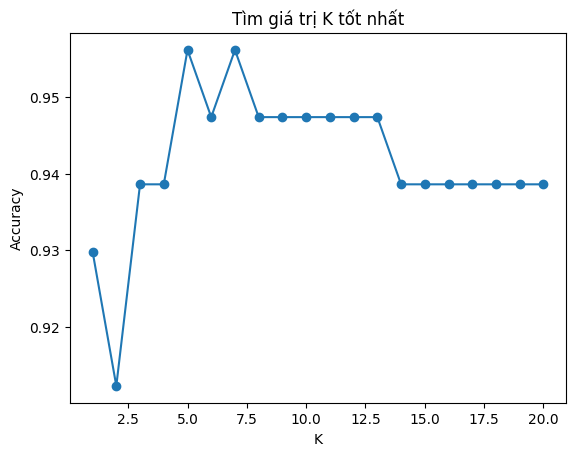

In [12]:
accuracies = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Vẽ biểu đồ
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Tìm giá trị K tốt nhất')
plt.show()


AUC Score: 0.9816468253968255


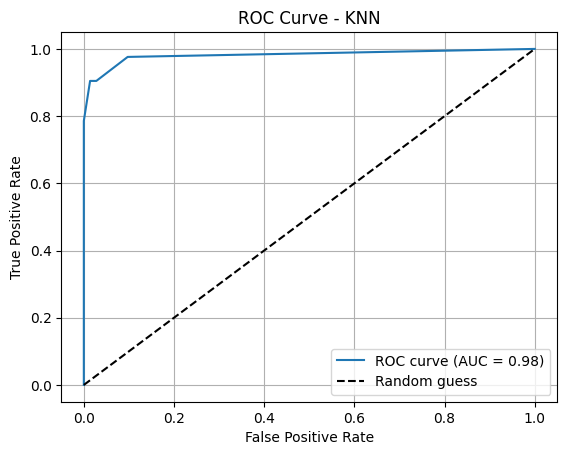

Số mẫu test: 114
Phân phối nhãn: Diagnosis
0    72
1    42
Name: count, dtype: int64


In [ ]:
# Dự đoán xác suất cho lớp dương tính (ác tính)
y_proba = model.predict_proba(X_test)[:, 1]

# Tính AUC
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

# Vẽ đường ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("Số mẫu test:", len(y_test))
print("Phân phối nhãn:", y_test.value_counts())


## 6. Huấn luyện và đánh giá với K tối ưu

In [15]:
best_k = np.argmax(accuracies) + 1  # vì index bắt đầu từ 0
print("Giá trị K tốt nhất:", best_k)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Giá trị K tốt nhất: 5
Accuracy: 0.956140350877193
Confusion Matrix:
 [[71  1]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## kiểm tra 10 dòng bạn cung cấp

In [9]:
# Thêm đoạn kiểm tra 10 dòng dữ liệu mới

# Chuỗi dữ liệu
new_data_str = """
925291,B,11.51,23.93,74.52,403.5,0.09261,0.1021,0.1112,0.04105,0.1388,0.0657,0.2388,2.904,1.936,16.97,0.0082,0.02982,0.05738,0.01267,0.01488,0.004738,12.48,37.16,82.28,474.2,0.1298,0.2517,0.363,0.09653,0.2112,0.08732
925292,B,14.05,27.15,91.38,600.4,0.09929,0.1126,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.02678,0.02071,0.01626,0.0208,0.005304,15.3,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.225,0.08321
925311,B,11.2,29.37,70.67,386,0.07449,0.03558,0,0,0.106,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0,0,0.01989,0.001773,11.92,38.3,75.19,439.6,0.09267,0.05494,0,0,0.1566,0.05905
925622,M,15.22,30.62,103.4,716.9,0.1048,0.2087,0.255,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.02137,0.006142,17.52,42.79,128.7,915,0.1417,0.7917,1.17,0.2356,0.4089,0.1409
926125,M,20.92,25.09,143,1347,0.1099,0.2236,0.3174,0.1474,0.2149,0.06879,0.9622,1.026,8.758,118.8,0.006399,0.0431,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.1,1819,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
926424,M,21.56,22.39,142,1479,0.111,0.1159,0.2439,0.1389,0.1726,0.05623,1.176,1.256,7.673,158.7,0.0103,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.4,166.1,2027,0.141,0.2113,0.4107,0.2216,0.206,0.07115
926682,M,20.13,28.25,131.2,1261,0.0978,0.1034,0.144,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.0395,0.01678,0.01898,0.002498,23.69,38.25,155,1731,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.0473,0.01557,0.01318,0.003892,18.98,34.12,126.7,1124,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
927241,M,20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124
92751,B,7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039
"""

# Chuyển chuỗi thành danh sách các dòng

new_data = pd.read_csv(StringIO(new_data_str), header=None)

# Đặt lại tên cột tương ứng
new_data.columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Lưu lại nhãn thật
true_labels = new_data['Diagnosis'].map({'M': 1, 'B': 0}).values

# Bỏ cột ID và Diagnosis, chỉ lấy đặc trưng
X_new = new_data.drop(['ID', 'Diagnosis'], axis=1)

# Chuẩn hóa dữ liệu giống như dữ liệu huấn luyện
X_new_scaled = scaler.transform(X_new)

# Dự đoán
y_new_pred = model.predict(X_new_scaled)

# In kết quả
print("Label thật:     ", true_labels)
print("Label dự đoán:  ", y_new_pred)
print("Độ chính xác trên 10 mẫu:", accuracy_score(true_labels, y_new_pred))
print("Confusion Matrix:\n", confusion_matrix(true_labels, y_new_pred))
print("Classification Report:\n", classification_report(true_labels, y_new_pred))


Label thật:      [0 0 0 1 1 1 1 1 1 0]
Label dự đoán:   [0 0 0 1 1 1 1 1 1 0]
Độ chính xác trên 10 mẫu: 1.0
Confusion Matrix:
 [[4 0]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Ví dụ: Kiểm thử một vài mẫu

In [13]:
# Huấn luyện mô hình KNN với K = 5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
sample_indexes = X_test[:5]
sample_true_labels = y_test.iloc[:5]
predicted_labels = knn.predict(sample_indexes)

# 8. In kết quả
for i in range(5):
    print(f"Mẫu {i+1}:")
    print("  Dự đoán:", "Malignant" if predicted_labels[i] == 1 else "Benign")
    print("  Thực tế:", "Malignant" if sample_true_labels.iloc[i] == 1 else "Benign")

Mẫu 1:
  Dự đoán: Benign
  Thực tế: Benign
Mẫu 2:
  Dự đoán: Malignant
  Thực tế: Malignant
Mẫu 3:
  Dự đoán: Benign
  Thực tế: Benign
Mẫu 4:
  Dự đoán: Benign
  Thực tế: Malignant
Mẫu 5:
  Dự đoán: Benign
  Thực tế: Benign


In [14]:
# 6. Lấy 5 mẫu từ tập test để kiểm tra
sample_X = X_test[:5]
sample_y_true = y_test.iloc[:5]
sample_y_pred = knn.predict(sample_X)

# 7. In kết quả so sánh dự đoán và thực tế
for i in range(5):
    print(f"Mẫu {i+1}:")
    print("  Dự đoán :", "Ác tính (Malignant)" if sample_y_pred[i] == 1 else "Lành tính (Benign)")
    print("  Thực tế :", "Ác tính (Malignant)" if sample_y_true.iloc[i] == 1 else "Lành tính (Benign)")
    print("  -->", "✅ Đúng" if sample_y_pred[i] == sample_y_true.iloc[i] else "❌ Sai")
    print()

Mẫu 1:
  Dự đoán : Lành tính (Benign)
  Thực tế : Lành tính (Benign)
  --> ✅ Đúng

Mẫu 2:
  Dự đoán : Ác tính (Malignant)
  Thực tế : Ác tính (Malignant)
  --> ✅ Đúng

Mẫu 3:
  Dự đoán : Lành tính (Benign)
  Thực tế : Lành tính (Benign)
  --> ✅ Đúng

Mẫu 4:
  Dự đoán : Lành tính (Benign)
  Thực tế : Ác tính (Malignant)
  --> ❌ Sai

Mẫu 5:
  Dự đoán : Lành tính (Benign)
  Thực tế : Lành tính (Benign)
  --> ✅ Đúng

